In [2]:
import sys
sys.path.append('..')


#from rdsolver import turing_pattern as tNp
#dir(rds)
from rdsolver.reaction_diffu import *

In [ ]:
class GrayScott(RDSystem):
    def __init__(self,
                 Du = 0.1, 
                 Dv = .05,
                 f = 0.037,
                 k = 0.06,
                 space_size = 100,dim = 2,
                 dt=0.01,
                 boundary = 'periodic',
                 init_dis= 'random',
                 *args):
        self.k = k
        self.f = f
        Reactant1 = Reactant(Du)
        Reactant2 = Reactant(Dv)
        reactants = [Reactant1,Reactant2]
        RDSystem.__init__(self,reactants,
                          space_size =space_size, 
                          init_dis = init_dis ,
                          boundary = boundary, dim=dim,dt=dt)
        self.dx = 1
        self.dis = self.dis
        self.dis[0,:,:] = 1
        self.dis[1,:,:] = 0
        self.dis[1,np.random.randint(space_size,size=20),np.random.randint(space_size,size=20)] = 1
        #self.dis[1,round(4*space_size/9):round(5*space_size/9),round(4*space_size/9):round(5*space_size/9)] = 1
        self.dis[1] = self.dis[1]
        
    def reaction(self):
        u = self.dis
        dudt_reac = np.zeros(np.shape(self.dis))      
        if self.dim==2: #2D 
            dudt_reac[0,:,:] += - u[0] * u[1]**2 + self.f * (1.0 - u[0])
            dudt_reac[1,:,:] += u[0] * u[1]**2 - (self.f + self.k) * u[1]
        return dudt_reac

In [140]:
GS = GrayScott(Du = 0.1, 
                 Dv = .05,
                 f = 0.05,
                 k = 0,
                 space_size = 50,
              dt = 1)

#Turing_1.stationary()
t=np.linspace(0,10000,100)
time_series = GS.integrate(t);

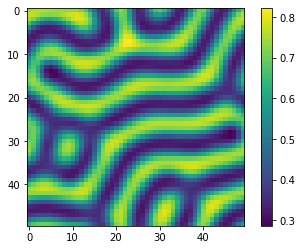

In [141]:
plt.imshow(Turing_1.dis[0])
plt.colorbar()
plt.show()

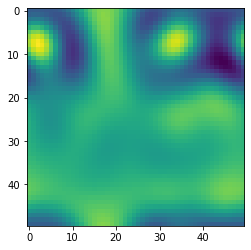

In [143]:
plt.imshow(time_series[13].reshape((2,50,50))[0,:,:])

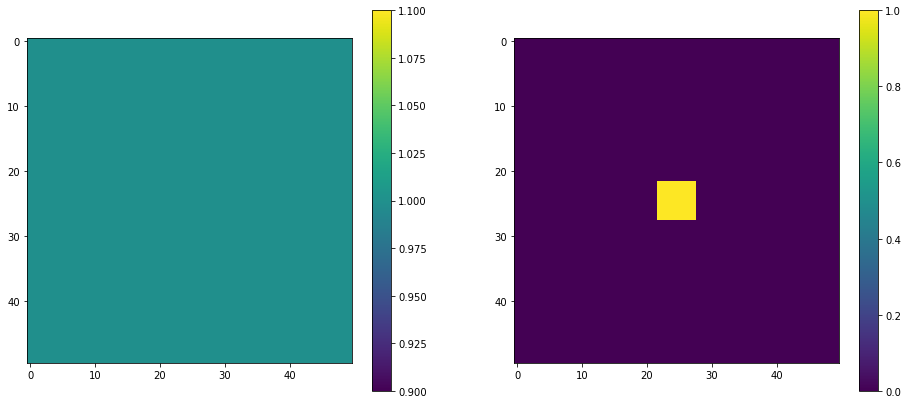

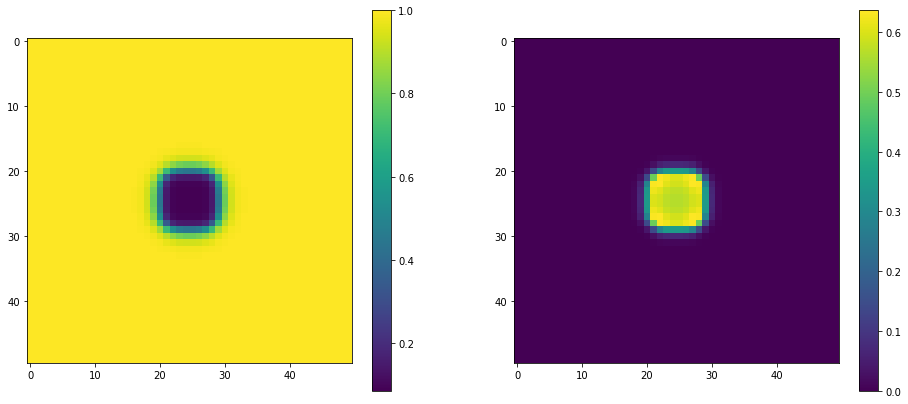

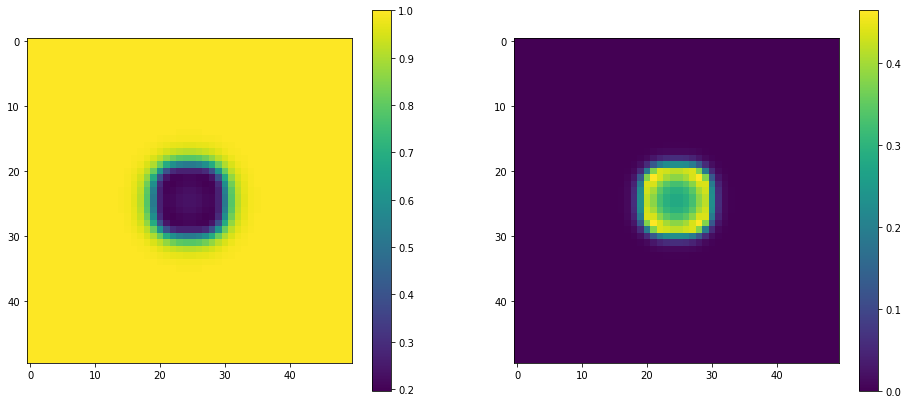

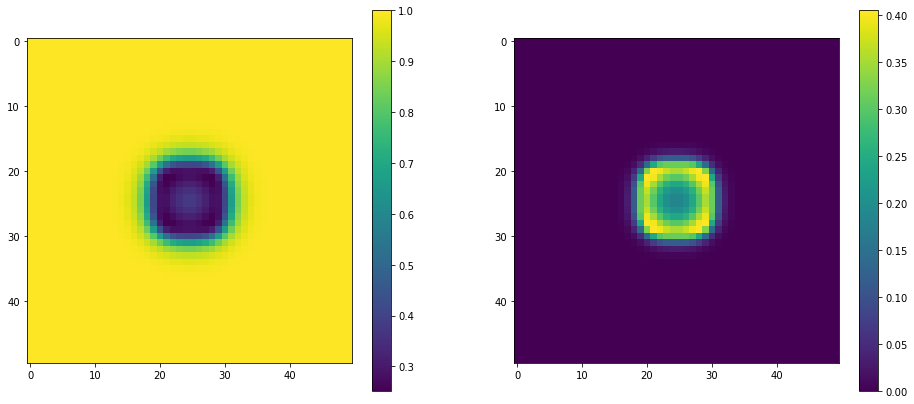

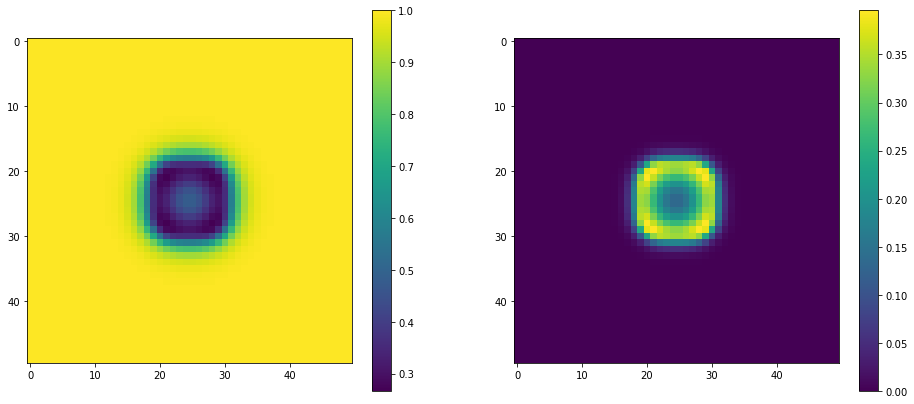

In [95]:
GS = GrayScott(Du = 0.1, 
                 Dv = .05,
                 f = 0.037,
                 k = 0.06,
                 space_size = 50,
              dt = 1)

for i in range(5):
    fig, (ax1,ax2) = plt.subplots(figsize = (16,7), nrows=1, ncols=2)
    p1 = ax1.imshow(GS.dis[0])
    #ax1.colorbar()
    fig.colorbar(p1, ax=ax1)
    p2 = ax2.imshow(GS.dis[1])
    fig.colorbar(p2, ax=ax2)
    #fig.colorbar()
    plt.show()
    GS.evolve(20)


In [ ]:
|